In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
acc_1 = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results_BPIC2020_ratio0/PermitLog_rbs500_hbs100_2023-08-19_22-51-22/evaluation_res.json').loc['future_losses']['accuracy']

In [3]:
acc_2 = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/PermitLog_rbs1000_hbs200_2023-08-31_12-55-44/evaluation_res.json').loc['future_losses']['accuracy']

ValueError: x and y must have same first dimension, but have shapes (173,) and (86,)

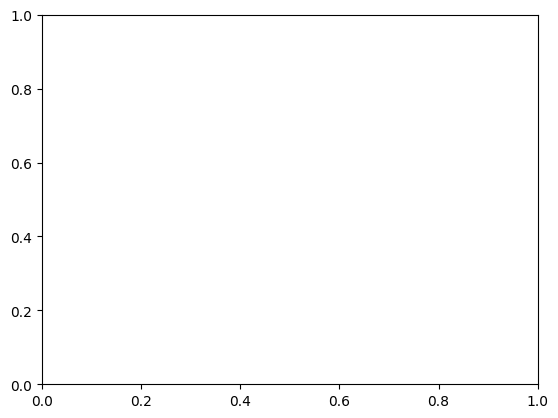

In [4]:
plt.plot(acc_1,acc_2)

In [105]:
acc_sdl_tfcl_30 = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/DomesticDeclarations_rbs500_hbs100_2023-07-09_16-31-45/DomesticDeclarations_rbs500_hbs100_2023-07-09_16-31-45.json').loc['future_losses']['accuracy']

In [119]:
acc_sdl_tfcl_60 = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/InternationalDeclarations_rbs500_hbs100_2023-07-11_10-51-38/InternationalDeclarations_rbs500_hbs100_2023-07-11_10-51-38.json').loc['future_losses']['accuracy']

In [107]:
acc_sdl_update = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_update/results/DomesticDeclarations_rbs500_hbs100_2023-07-08_14-43-29/DomesticDeclarations_rbs500_hbs100_2023-07-08_14-43-29.json').loc['future_losses']['accuracy']

In [108]:
acc_sdl_update_30 = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_update/results/DomesticDeclarations_rbs500_hbs100_2023-07-09_16-25-56/DomesticDeclarations_rbs500_hbs100_2023-07-09_16-25-56.json').loc['future_losses']['accuracy']

In [115]:
acc_sdl_update_60 = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_update/results/InternationalDeclarations_rbs500_hbs100_2023-07-11_10-59-40/InternationalDeclarations_rbs500_hbs100_2023-07-11_10-59-40.json').loc['future_losses']['accuracy']

In [72]:
acc_arf_tfcl = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/BPIC15_ALL_rbs500_hbs100_2023-07-01_11-37-41/BPIC15_ALL_rbs500_hbs100_2023-07-01_11-37-41.json').loc['future_losses']['accuracy']

In [49]:
#acc_sdl_w1 = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_iu_w1/results/BPIC15_ALL_rbs500_hbs100_2023-06-28_18-41-54/evaluation_res.json').loc['future_losses']['accuracy']

In [33]:
acc_sdl_w1_not_reset = pd.read_json('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_iu_w1/results/BPIC15_ALL_rbs500_hbs100_2023-07-01_15-21-59/evaluation_res.json').loc['future_losses']['accuracy']

In [11]:
acc_sdl_noretrain = pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_no_retrain/results/PermitLog_rbs500.csv',header=None).iloc[:,1].tolist()

In [6]:

def compute_batch_fixed_size_accuracy(prediction_results,fixed_size):
    numEvents = prediction_results.shape[0]
    numBatches = int(numEvents/fixed_size)
    print("Num batches is {}".format(numBatches))
    batch_accuracy = []
    for i in range(numBatches):
        batch_accuracy.append(np.sum(prediction_results[i*fixed_size:(i+1)*fixed_size,0]==prediction_results[i*fixed_size:(i+1)*fixed_size,1])/fixed_size)
    return batch_accuracy

In [21]:
filepath ='/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/PermitLog_rbs1000_hbs200_2023-08-31_12-55-44/prediction_results.csv'
batch_size = 500
# Read CSV file into a NumPy array
prediction_results = np.genfromtxt(filepath, delimiter=',')
acc_1 = compute_batch_fixed_size_accuracy(prediction_results,batch_size)

Num batches is 172


In [22]:
filepath ='/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results_BPIC2020_ratio0/PermitLog_rbs500_hbs100_2023-08-19_22-51-22/prediction_results.csv'
batch_size = 500
# Read CSV file into a NumPy array
prediction_results = np.genfromtxt(filepath, delimiter=',')
acc_2 = compute_batch_fixed_size_accuracy(prediction_results,batch_size)

Num batches is 173


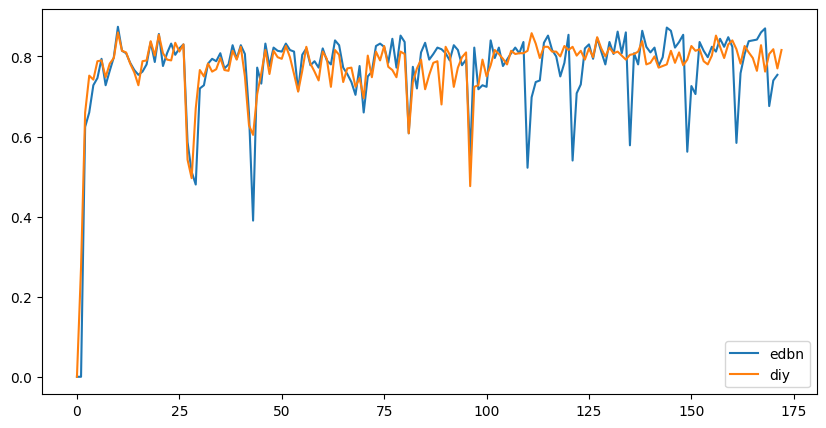

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(acc_1, label='edbn')
plt.plot(acc_2, label='diy')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


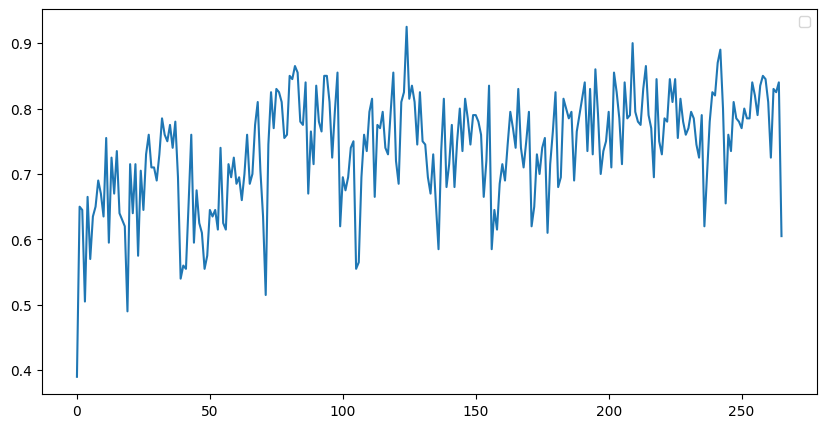

In [8]:
xaxis = np.arange(len(acc_sdl_w1))*batch_size
plt.figure(figsize=(10,5))
# plt.title('DomesticDeclarations')
#plt.plot(xaxis,acc_sdl_tfcl, label='sdl_tfcl')
plt.plot(xaxis,acc_sdl_w1[:len(acc_sdl_tfcl)])
plt.plot(xaxis,acc_sdl_w1_1)
#plt.plot(xaxis, acc_sdl_w1[:len(acc_sdl_tfcl)], label='sdl_w1')
#plt.plot(xaxis, acc_sdl_update[:len(acc_sdl_tfcl)], label='sdl_update')
plt.legend()
plt.show()

In [29]:
def compute_total_accuracy(prediction_results):
    numEvents = prediction_results.shape[0]
    return np.sum(prediction_results[:,0]==prediction_results[:,1])/numEvents
print('tfcl_sdl',compute_total_accuracy(pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_tfcl_sdl/results/DomesticDeclarations_rbs500_hbs50_2023-07-05_15-11-58/prediction_results.csv',skiprows=1,header=None).values))
print('sdl_w1',compute_total_accuracy(pd.read_csv('/Users/meruozhu/Downloads/MP_data/MP_codes/MP/experiments/experiments_sdl_iu_w1/results/DomesticDeclarations_rbs20_hbs5_2023-07-05_12-33-35/results.csv').values))

tfcl_sdl 0.8147678571428572
sdl_w1 0.8976185413565809


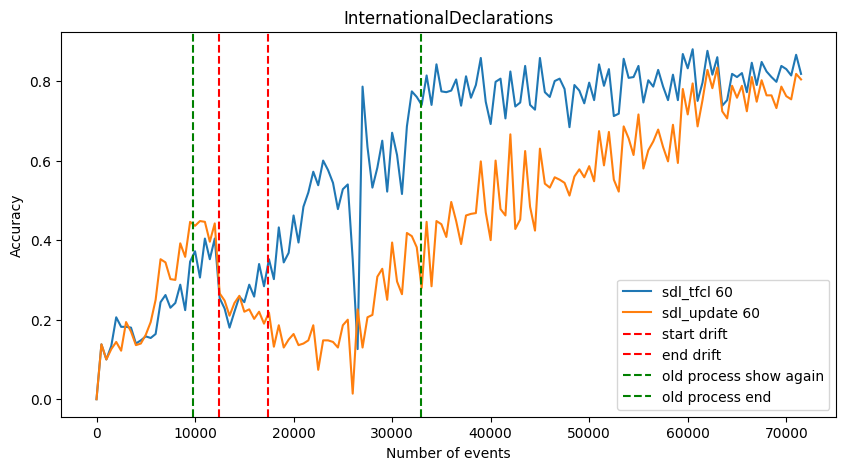

In [127]:
batch_size=500
data_name = 'InternationalDeclarations'
plt.figure(figsize=(10, 5))
xaxis = np.arange(len(acc_sdl_tfcl_60))*batch_size
# plt.plot(xaxis,acc_sdl_tfcl, label='sdl_tfcl')
# plt.plot(xaxis,acc_sdl_update, label='sdl_update')
# plt.plot(xaxis,acc_sdl_tfcl_30, label='sdl_tfcl 30')
# plt.plot(xaxis,acc_sdl_update_30, label='sdl_update 30')
plt.plot(xaxis,acc_sdl_tfcl_60, label='sdl_tfcl 60')
plt.plot(xaxis,acc_sdl_update_60, label='sdl_update 60')
#plt.plot(xaxis, acc_arf_tfcl, label='arf_tfcl')
#plt.plot(xaxis, acc_sdl_w1[:len(acc_sdl_tfcl)], label='sdl_w1')
#plt.plot(xaxis, acc_sdl_static_last[:len(acc_sdl_tfcl)], label='sdl_static_last')
#plt.plot(xaxis, acc_sdl_noretrain[:len(acc_sdl_update)], label='sdl_noretrain')
plt.xlabel('Number of events')
plt.ylabel('Accuracy')
plt.title(data_name)

# Draw vertical red line at x-axis = 15923
plt.axvline(x=12467, color='r', linestyle='--', label='start drift')
plt.axvline(x=17361, color='r', linestyle='--', label='end drift')
plt.axvline(x=batch_size*((1-0.175)/2+0.175)*len(acc_sdl_tfcl), color='g', linestyle='--', label='old process show again')
plt.axvline(x=batch_size*0.175*len(acc_sdl_tfcl), color='g', linestyle='--', label='old process end')

plt.legend()

In [117]:
def plot_acc(acc_sdl_update, acc_sdl_tfcl,batch_size, title):
    plt.figure(figsize=(10, 5))
    xaxis = np.arange(len(acc_sdl_tfcl))*batch_size
    plt.plot(xaxis,acc_sdl_update, label='sdl_update')
    plt.plot(xaxis,acc_sdl_tfcl, label='sdl_tfcl')
    #plt.plot(xaxis, acc_arf_tfcl, label='arf_tfcl')
    #plt.plot(xaxis, acc_sdl_w1[:len(acc_sdl_tfcl)], label='sdl_w1')
    #plt.plot(xaxis, acc_sdl_static_last[:len(acc_sdl_tfcl)], label='sdl_static_last')
    #plt.plot(xaxis, acc_sdl_noretrain[:len(acc_sdl_update)], label='sdl_noretrain')
    plt.xlabel('Number of events')
    plt.ylabel('Accuracy')
    plt.title(title)

    # Draw vertical red line at x-axis = 15923
    plt.axvline(x=12467, color='r', linestyle='--', label='start drift')
    plt.axvline(x=17361, color='r', linestyle='--', label='end drift')
    plt.axvline(x=batch_size*0.6*len(acc_sdl_tfcl), color='g', linestyle='--', label='old process show again')
    plt.axvline(x=batch_size*0.2*len(acc_sdl_tfcl), color='g', linestyle='--', label='old process end')
    
    plt.legend()
    
    plt.show()

In [38]:
13677/(len(acc_sdl_tfcl)*500)

0.1581156069364162

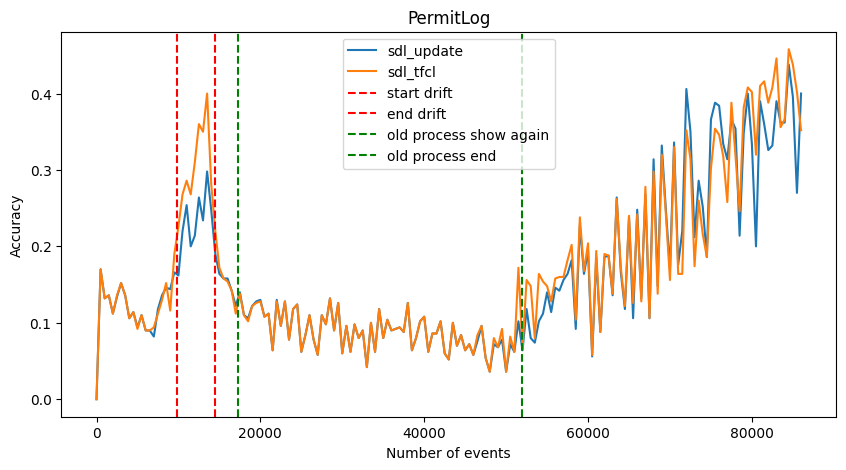

In [44]:
plot_acc(acc_sdl_update, acc_sdl_tfcl,500, 'PermitLog')

In [24]:
acc_sdl_update

AttributeError: 'list' object has no attribute 'avg'

In [52]:
def get_list_average(list):
    list_average = []
    for i in range(len(list)):
        list_average.append(np.mean(list[:i+1]))
    return list_average
def plot_acc_average(acc_sdl_update, acc_sdl_tfcl, acc_arf_tfcl,title):
    plt.figure(figsize=(8, 6))
    plt.plot(get_list_average(acc_sdl_update), label='sdl_update')
    plt.plot(get_list_average(acc_sdl_tfcl), label='sdl_tfcl')
    plt.plot(acc_arf_tfcl, label='arf_tfcl')
    plt.xlabel('Epoch')
    plt.ylabel('Average Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

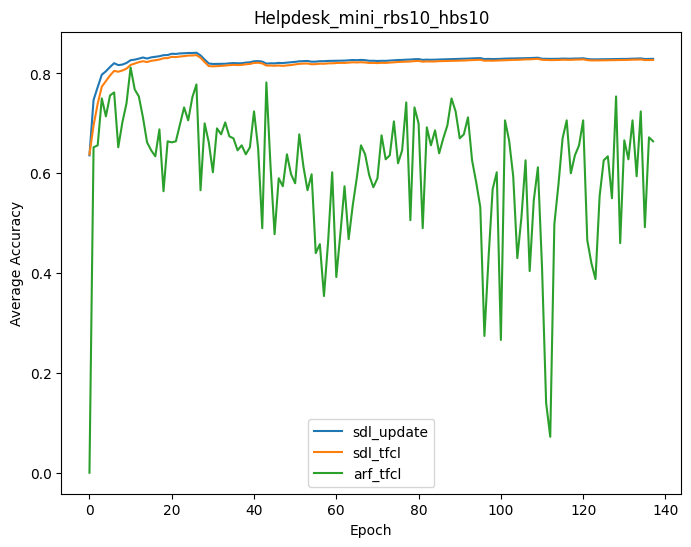

In [53]:
plot_acc_average(acc_sdl_update, acc_sdl_tfcl, acc_arf_tfcl, 'Helpdesk_mini_rbs10_hbs10')

In [39]:
sum(acc_sdl_update)/len(acc_sdl_update)

0.144304347826087

In [40]:
sum(acc_sdl_tfcl)/len(acc_sdl_tfcl)

0.14444927536231889